In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [2]:
dataset = pd.read_csv('GalaxyZoo1_DR_table2.csv')
dataset.head()

,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,587727178986356823,00:00:00.41,-10:22:25.7,59,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0,0,1
1,587727227300741210,00:00:00.74,-09:13:20.2,18,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1,0,0
2,587727225153257596,00:00:01.03,-10:56:48.0,68,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0,0,1
3,587730774962536596,00:00:01.38,+15:30:35.3,52,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0,1,0
4,587731186203885750,00:00:01.55,-00:05:33.3,59,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0,0,1


In [3]:
print("The shape of the dataset : ", dataset.shape)

The shape of the dataset :  (667944, 16)


In [4]:
data = dataset.drop(['OBJID','RA','DEC'],axis=1)

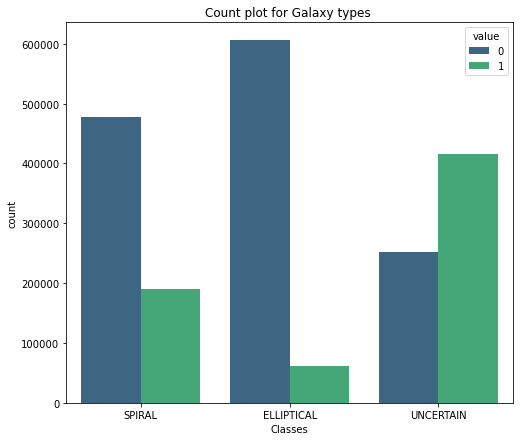

In [5]:
plt.figure(figsize=(8,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt), palette = "viridis")
plt.xlabel('Classes')
plt.show()

In [6]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))

model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
start = time.perf_counter()

In [8]:
model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))

Epoch 1/20
16699/16699 [==============================] - 8s 487us/step - loss: 0.2828 - accuracy: 0.8775
Epoch 2/20
16699/16699 [==============================] - 8s 483us/step - loss: 0.2451 - accuracy: 0.8942
Epoch 3/20
16699/16699 [==============================] - 8s 484us/step - loss: 0.2397 - accuracy: 0.8968
Epoch 4/20
16699/16699 [==============================] - 8s 474us/step - loss: 0.2367 - accuracy: 0.8978
Epoch 5/20
16699/16699 [==============================] - 8s 488us/step - loss: 0.2350 - accuracy: 0.8983
Epoch 6/20
16699/16699 [==============================] - 8s 482us/step - loss: 0.2341 - accuracy: 0.8987
Epoch 7/20
16699/16699 [==============================] - 8s 489us/step - loss: 0.2330 - accuracy: 0.8990
Epoch 8/20
16699/16699 [==============================] - 8s 487us/step - loss: 0.2290 - accuracy: 0.8991
Epoch 9/20
16699/16699 [==============================] - 8s 497us/step - loss: 0.2221 - accuracy: 0.9004
Epoch 10/20
16699/16699 [=====================

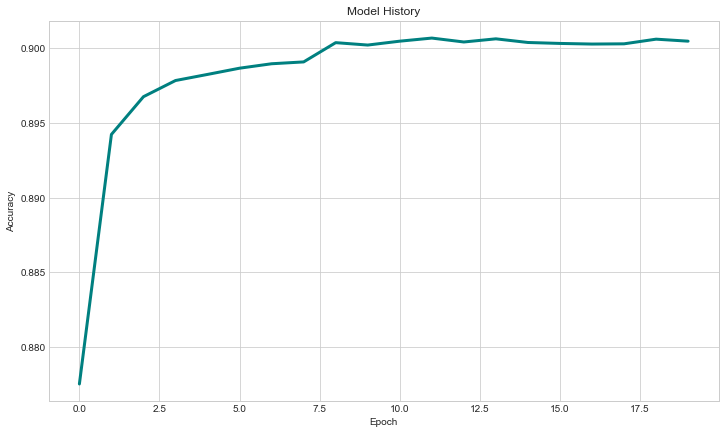

In [9]:
mod_history = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,7))
plt.style.use('seaborn-whitegrid')
plt.title('Model History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(mod_history['accuracy'],color='teal',lw=3)

In [10]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)
print('test accuracy:', acc)

522/522 - 0s - loss: 0.2165 - accuracy: 0.8998 - 272ms/epoch - 522us/step
test accuracy: 0.899849534034729
